In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#checking unique in dataset

df.nunique().sort_values()

Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
Property_Area          3
Dependents             4
Loan_Amount_Term      10
LoanAmount           203
CoapplicantIncome    287
ApplicantIncome      505
Loan_ID              614
dtype: int64

In [6]:
df.isna().sum()     # to check the null values in the column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.shape

(614, 13)

### Handling the missing values :

In [9]:
# filling the categorical features with mode:

df["Credit_History"] =df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Dependents"] =df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Loan_Amount_Term"] =df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Married"] =df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] =df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Gender"] =df["Gender"].fillna(df["Gender"].mode()[0])

In [10]:
# filling the continuous column with the mean:

df["LoanAmount"] =df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [11]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### * All the null values have been handled

### Data Visualization

#### * Univariate Analysis :

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#lets make a function for countplot

def countplot(a):
    plt.figure(figsize=[10,5])
    sns.countplot(x=a,data=df)
    plt.show()
    print("From the above plot we observe : \n",
           df[a].value_counts())

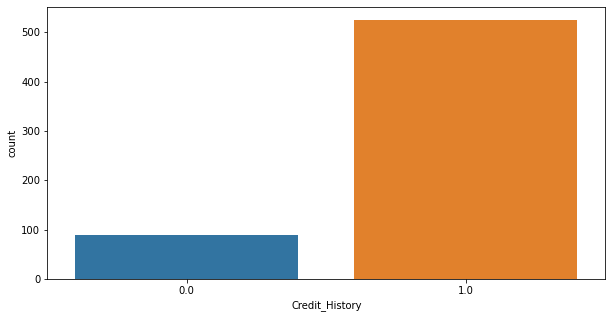

From the above plot we observe : 
 1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [23]:
countplot('Credit_History')

#### * From the above we see that the applicats who have credit history are 525 and without credit history are 89

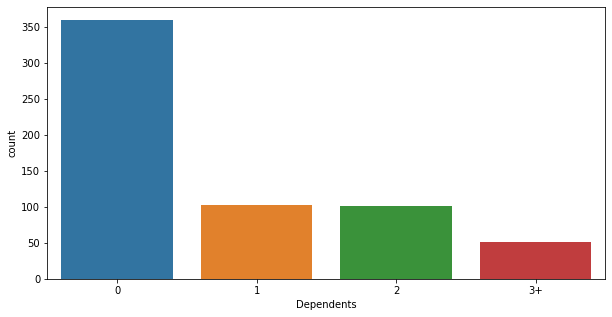

From the above plot we observe : 
 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [24]:
countplot("Dependents")

#### * Applicants having no dependents are 360 and with 1,2,3 or more than 3 dependents are 102, 101, 51 respectively.

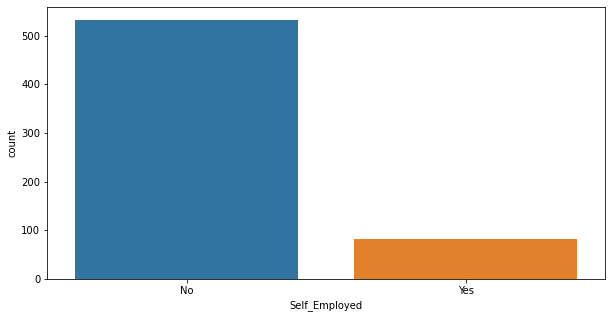

From the above plot we observe : 
 No     532
Yes     82
Name: Self_Employed, dtype: int64


In [26]:
countplot("Self_Employed")

#### * From the above plot we conclude that self employed are 82 and the rest 532 are not self employed

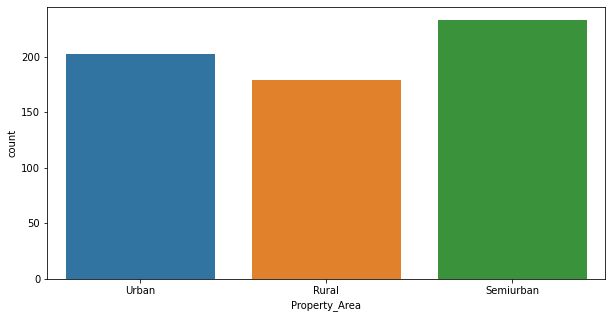

From the above plot we observe : 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [27]:
countplot("Property_Area")

#### * applicants who have property area in semi-urban,urban and rural are 233,202,179 respectively

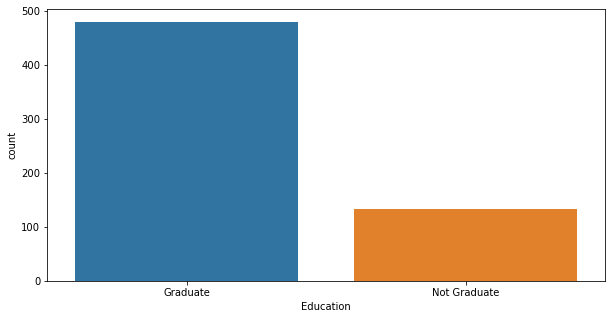

From the above plot we observe : 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [28]:
countplot("Education")

#### * Graduates are 480 and the ones withoud graduation degree are 134

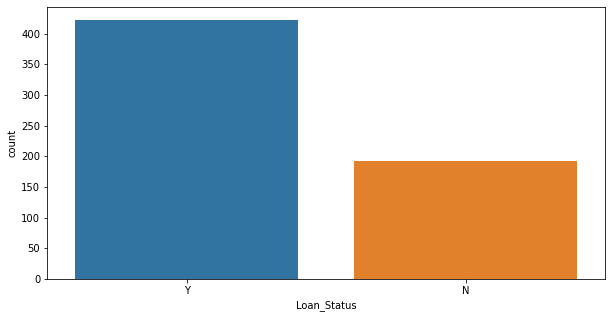

From the above plot we observe : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


In [29]:
countplot("Loan_Status")

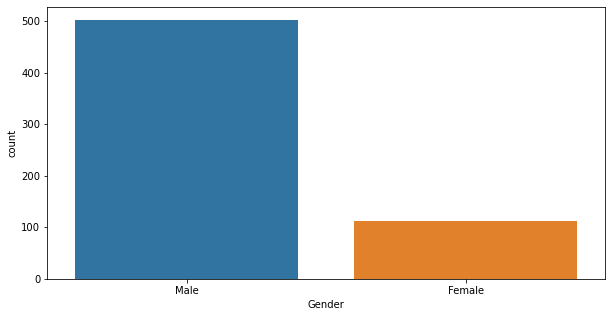

From the above plot we observe : 
 Male      502
Female    112
Name: Gender, dtype: int64


In [49]:
countplot('Gender')

#### * 502 applicants for loan are male and 112 applicants are female

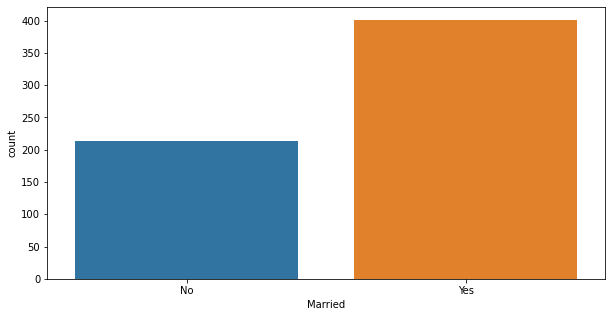

From the above plot we observe : 
 Yes    401
No     213
Name: Married, dtype: int64


In [50]:
countplot('Married')

#### * 401 applicants are married and 213 applicants are unmarried

In [37]:
df.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [36]:
df.Loan_Amount_Term.nunique()

10

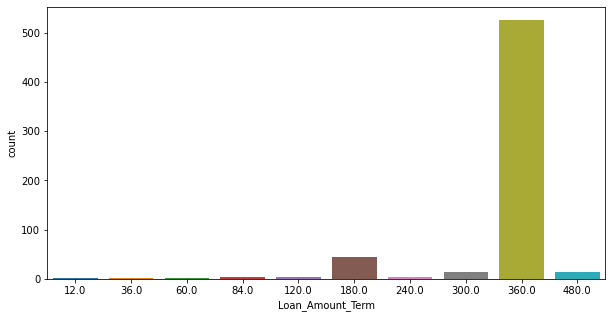

From the above plot we observe : 
 360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [38]:
countplot("Loan_Amount_Term")

#### * From the above we above we conclude that Loan_Amount_Term is a categorical column having 10 unique values, so we must convert it into object data type:

In [44]:
df.Loan_Amount_Term = df.Loan_Amount_Term.astype(object)

In [45]:
df.Loan_Amount_Term.dtype

dtype('O')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [31]:
import warnings
warnings.filterwarnings('ignore')

#### *  Checking the distribution of the continuous columns:

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

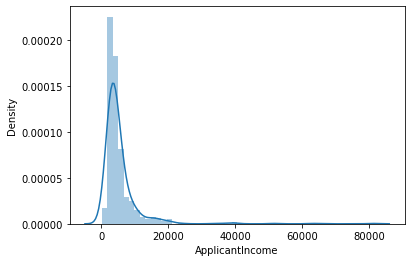

In [32]:
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

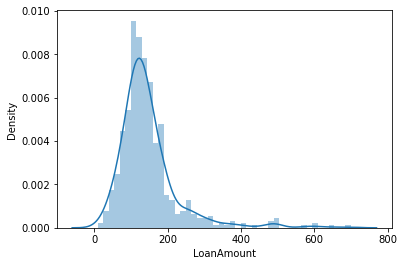

In [46]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

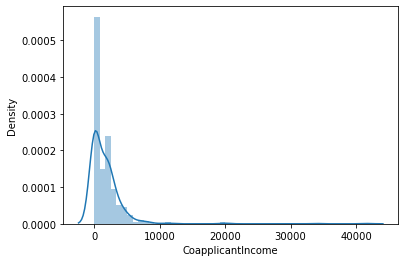

In [51]:
sns.distplot(df["CoapplicantIncome"])

### Bivariate Analysis :

In [52]:
cont = ["CoapplicantIncome", "LoanAmount", "ApplicantIncome"]

In [59]:
a =df.columns

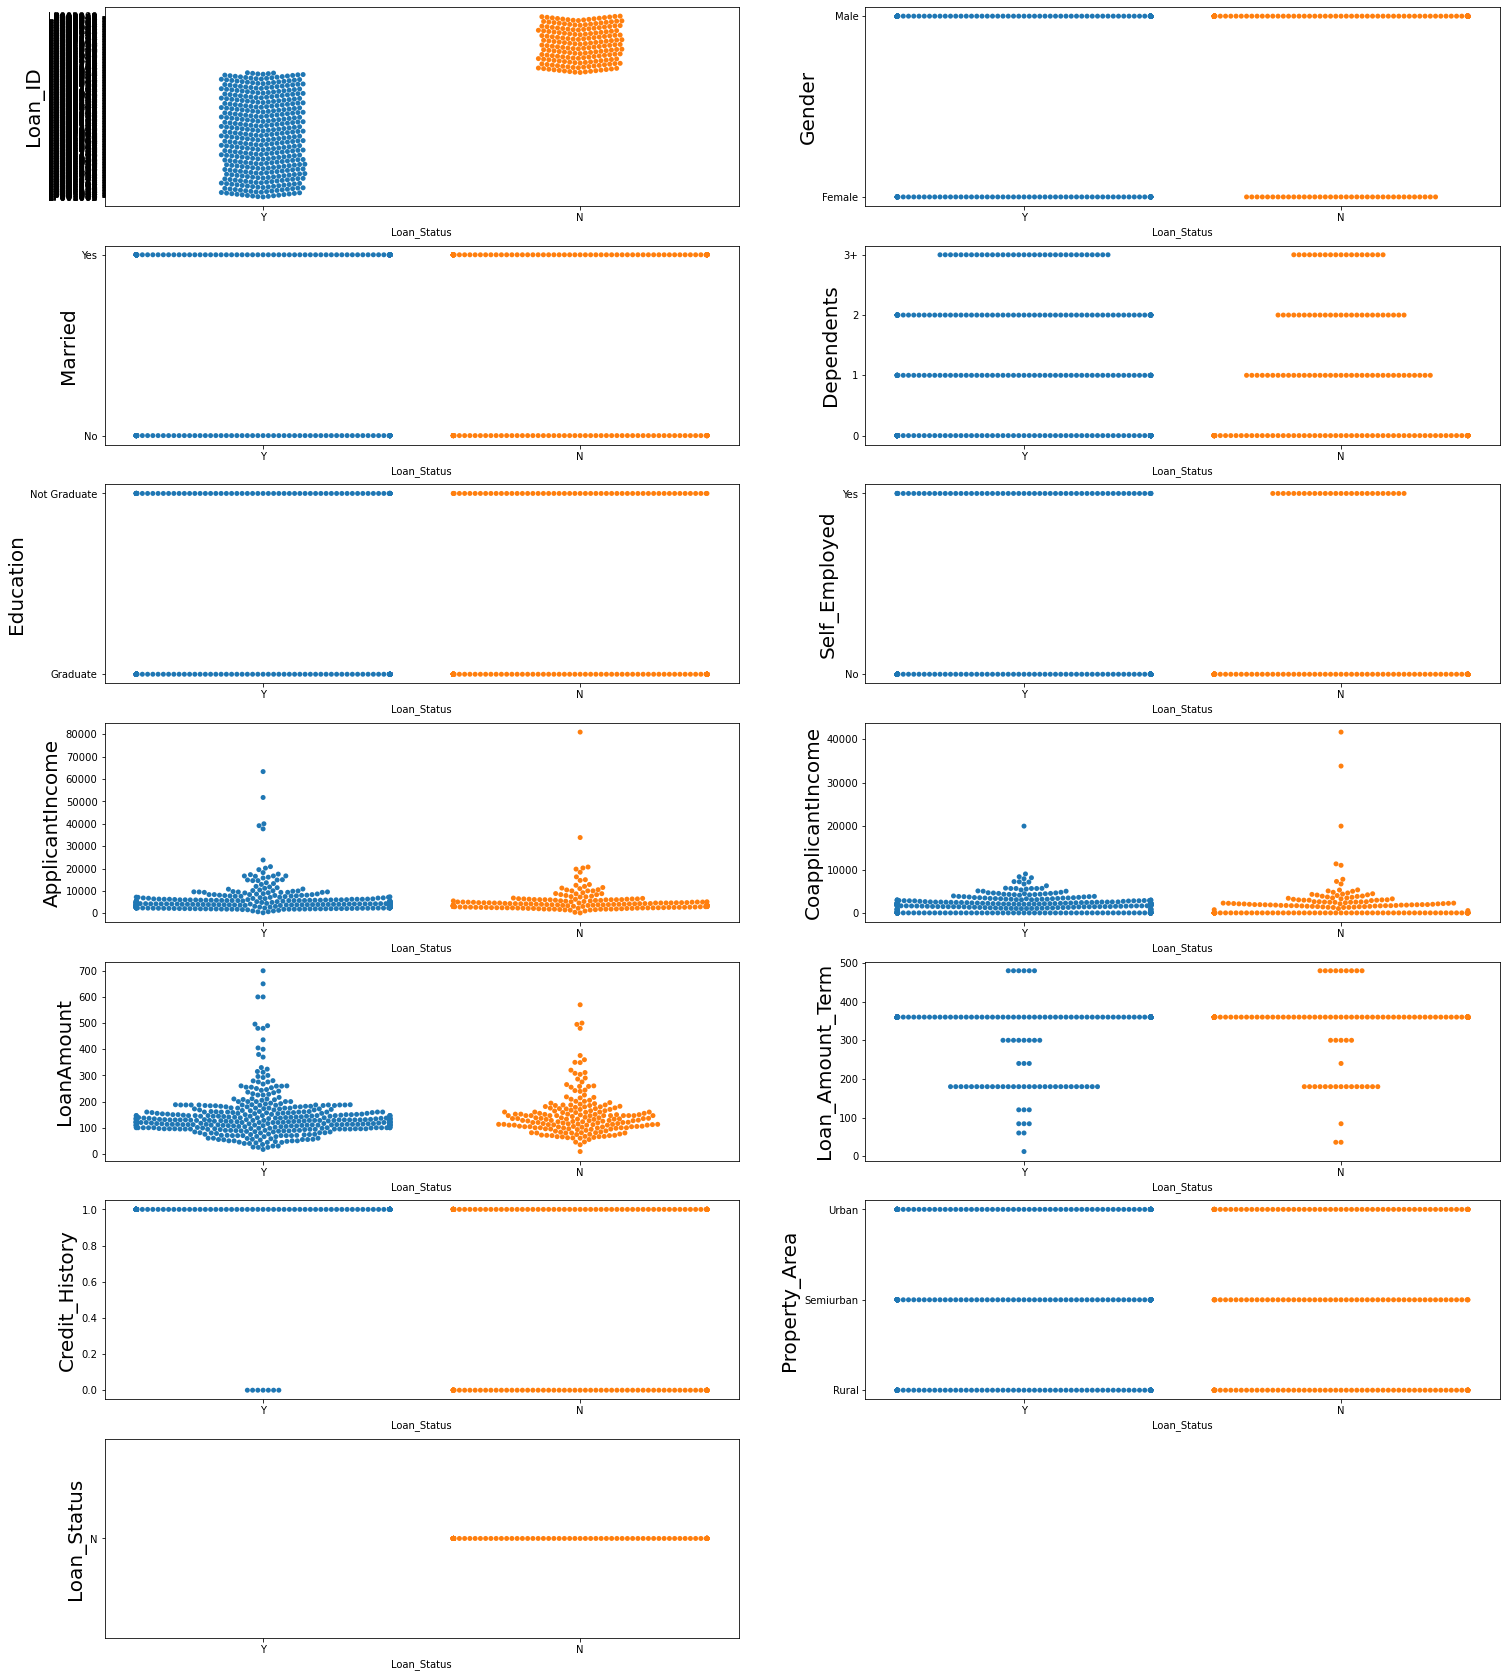

In [62]:
plt.figure(figsize=(25,30))
plotnumber=1
for i in a:
    if plotnumber < 15:
        ax= plt.subplot(7,2,plotnumber)
        sns.swarmplot(df["Loan_Status"],df[i])
        plt.ylabel(i,fontsize=20)
        plotnumber+=1
plt.show()

### Encoding the categorical variables using Ordinal Encoder

In [63]:
# for Encoding categorical:

from sklearn.preprocessing import OrdinalEncoder
label = OrdinalEncoder()

In [64]:
df[["Gender"]]=label.fit_transform(df[["Gender"]])
df[["Married"]]=label.fit_transform(df[["Married"]])
df[["Education"]]=label.fit_transform(df[["Education"]])
df[["Property_Area"]]=label.fit_transform(df[["Property_Area"]])
df[["Loan_Status"]]=label.fit_transform(df[["Loan_Status"]])
df[["Self_Employed"]]=label.fit_transform(df[["Self_Employed"]])
df[["Dependents"]]=label.fit_transform(df[["Dependents"]])
df[["Loan_Amount_Term"]]=label.fit_transform(df[["Loan_Amount_Term"]])

In [65]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,8.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,8.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,8.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,8.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,8.0,1.0,2.0,1.0


#### * All the categorical features have been encoded now

### Multivariate Analysis

In [67]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.065494,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.082642,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.096377,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.038808,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.052472,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.037500,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.038808,-0.052472,0.037500,1.000000,-0.002379,-0.086578,-0.005679
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.002379,1.000000,0.001963,0.540556


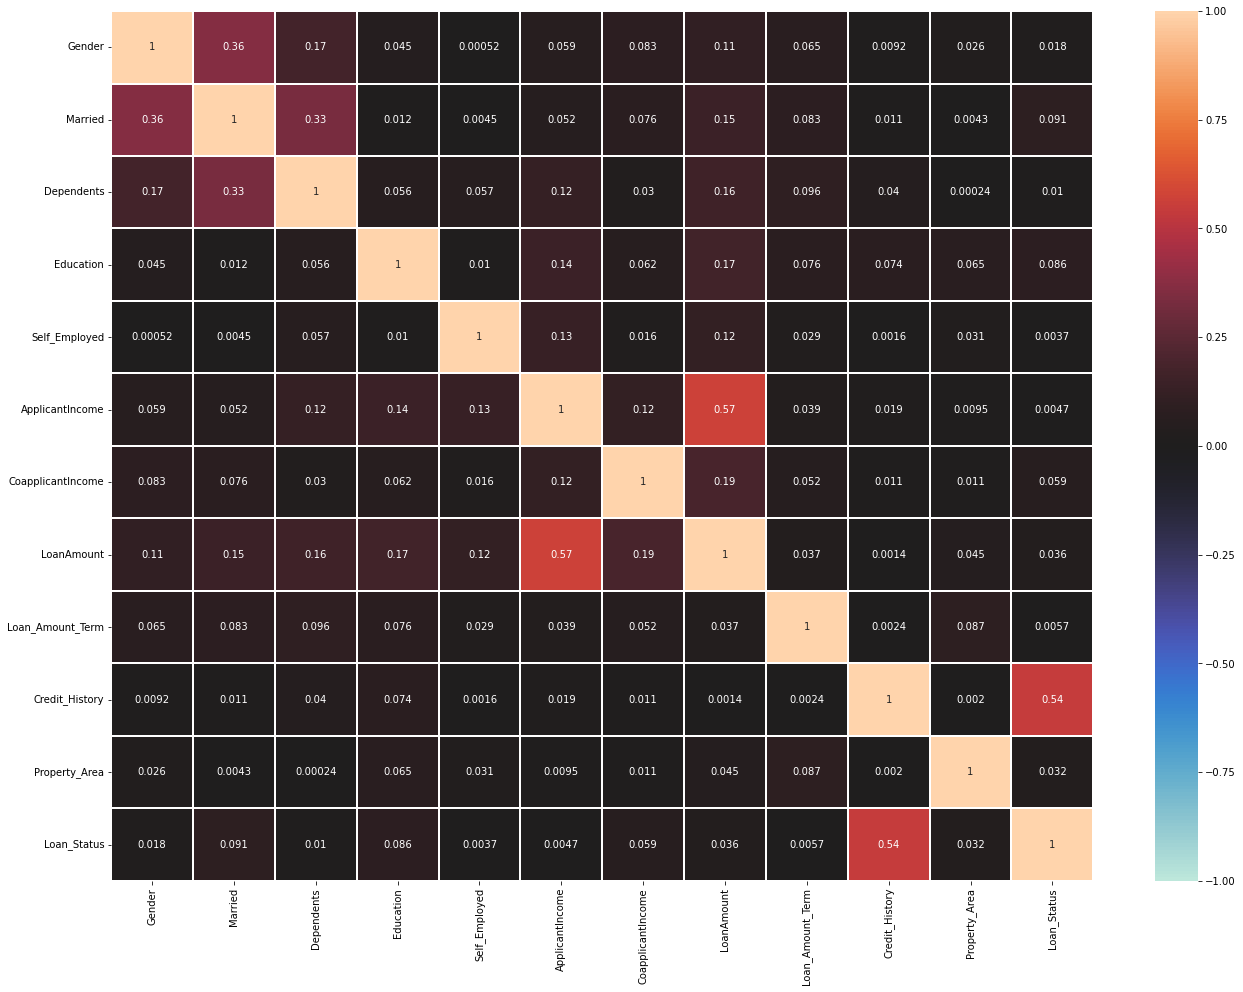

In [68]:
# Checking the correlation using the heatmap

df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show()

<AxesSubplot:title={'center':'Correlation with Loan Status'}>

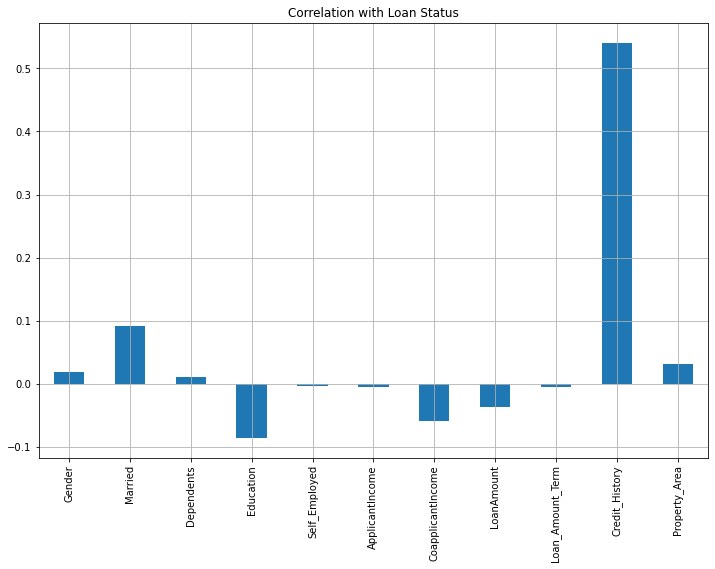

In [70]:
df.drop(columns = ['Loan_Status'], axis = 1).corrwith(df.Loan_Status).plot(kind = 'bar', grid = True, figsize = (12,8),
                                                     title = "Correlation with Loan Status")

#### * Credit History has a very good positive correlation with the Loan Status (target)

In [71]:
#droping unwanted column:

df.drop("Loan_ID",axis=1,inplace=True)

### Outlier Detection

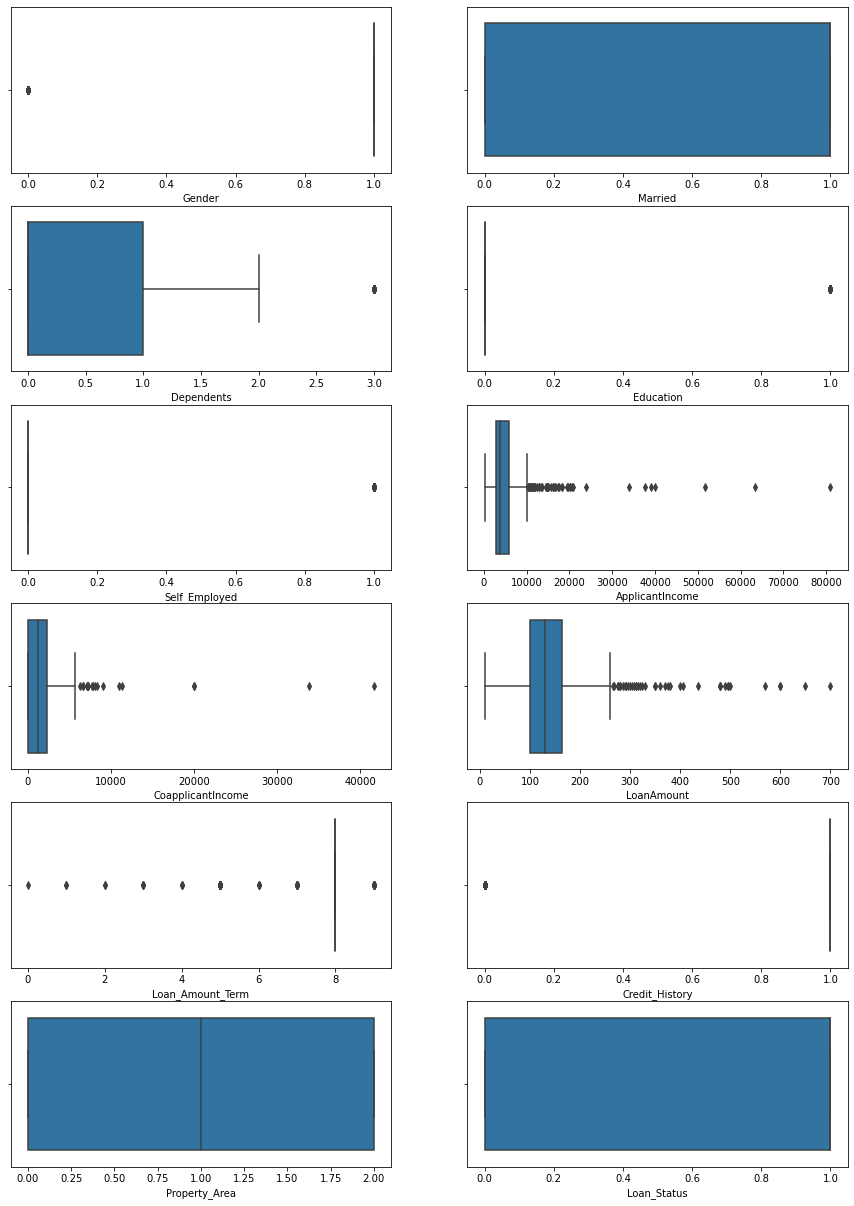

In [72]:
# for checking outliers:

plotnumber = 1
plt.figure(figsize=(15,25))
for i in df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(df[i])
        plotnumber+=1
        
plt.show()

### Outlier Removal :

In [73]:
#for removing outliers

from scipy.stats import zscore

z_score = zscore(df[["LoanAmount","CoapplicantIncome","ApplicantIncome"]])
abs_z = np.abs(z_score)

In [74]:
filter = (abs_z < 3).all(axis=1)

In [75]:
new_df = df[filter]

In [76]:
print(" Data loss is : ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

 Data loss is :  4.071661237785016


In [77]:
new_df.shape

(589, 12)

###  Skewness in the dataset :

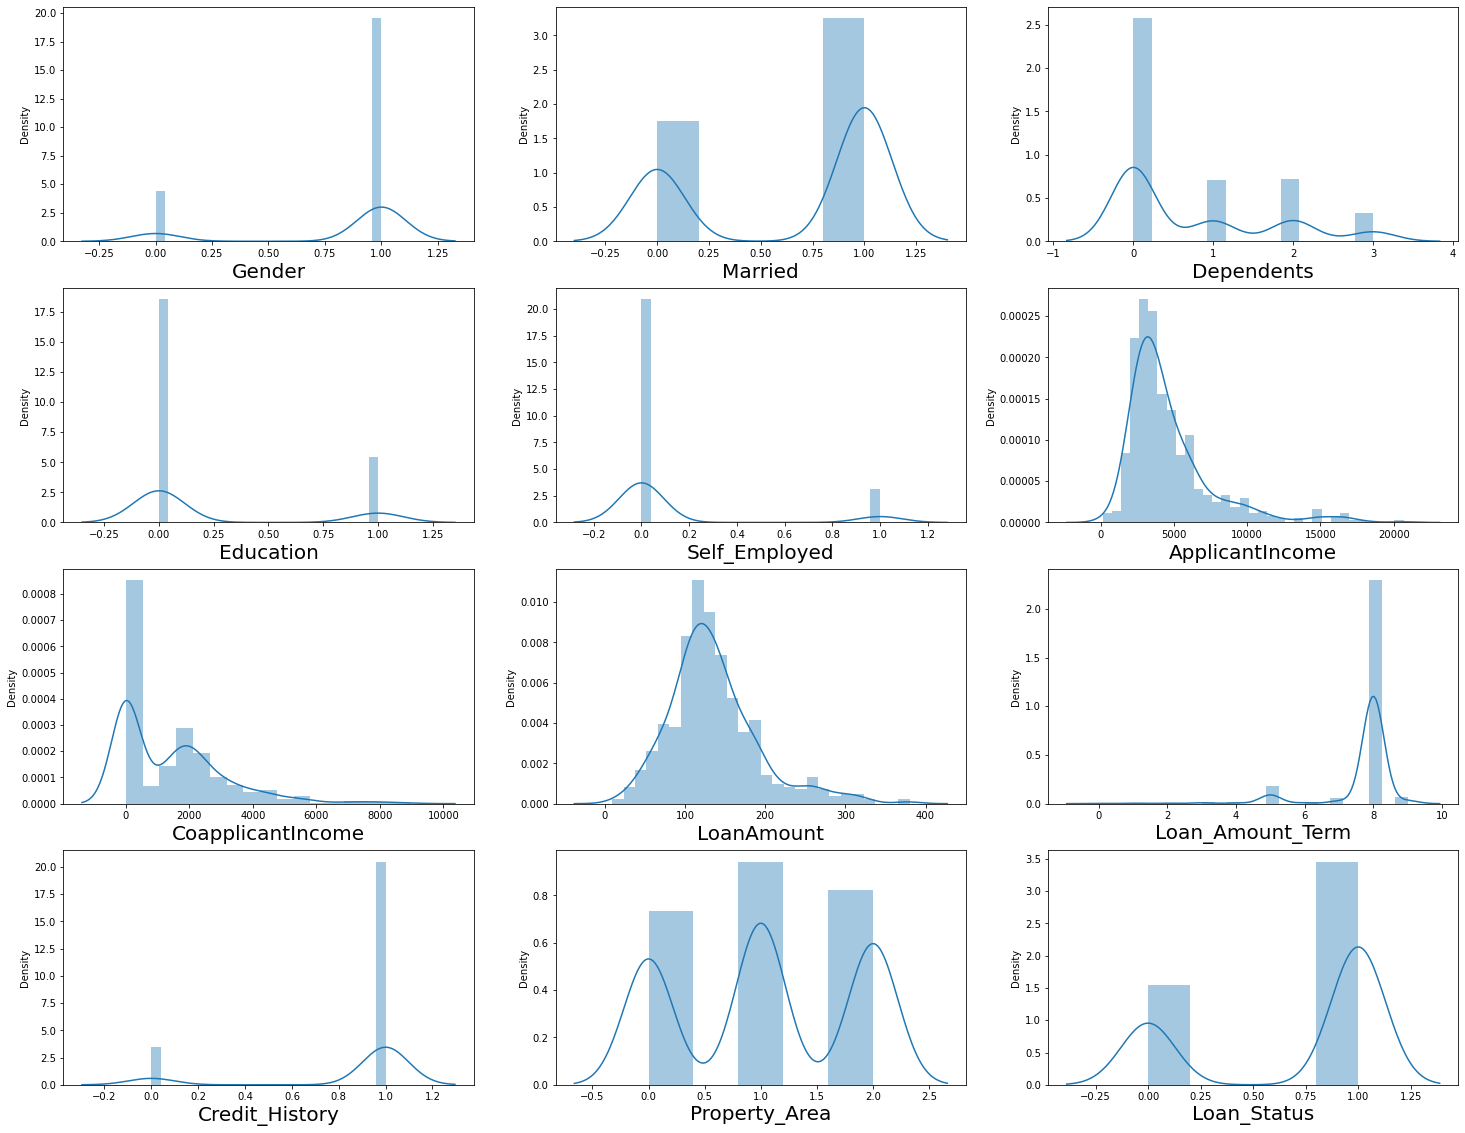

In [79]:
# for checking skewness :

plt.figure(figsize=(25,25))
plotnumber = 1
for column in new_df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### * Skewness is present in LoanAmount, CoapplicantIncome & Applicant Income, we shall quantify the skewness and then remove it.

In [80]:
# Checking the skewness in the dataset

new_df.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -3.358960
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

### Skewness Removal using Power Transformer :

In [81]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
new_df[["LoanAmount","CoapplicantIncome","ApplicantIncome"]] = pt.fit_transform(new_df[["LoanAmount","CoapplicantIncome","ApplicantIncome"]])

In [82]:
# checking the skewness again :

new_df.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
Loan_Amount_Term    -3.358960
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

#### * Skewness is removed and now we are good to go further 

### Model Building : 

#### * Splitting the dataset into features and target columns:

In [83]:
x= new_df.drop("Loan_Status",axis=1)
y = new_df["Loan_Status"]

In [84]:
y.value_counts()

1.0    407
0.0    182
Name: Loan_Status, dtype: int64

In [85]:
#Data Balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1.0    407
0.0    407
Name: Loan_Status, dtype: int64

In [86]:
# Now we are going to check the shape of x and y:

print(X_sm.shape,y_sm.shape)

(814, 11) (814,)


In [87]:
x.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

In [89]:
# Importing the necessary libraries :

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc,plot_roc_curve
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [92]:
scale = StandardScaler()

x_scaled=scale.fit_transform(X_sm)

x = pd.DataFrame(x_scaled,columns=X_sm.columns)

In [93]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.468988,-1.347911,-0.720028,-0.571604,-0.395274,0.659569,-1.081375,0.270703,0.296835,0.571197,1.214057
1,0.468988,0.771858,0.302745,-0.571604,-0.395274,0.213456,0.774300,-0.059200,0.296835,0.571197,-1.279203
2,0.468988,0.771858,-0.720028,-0.571604,2.690012,-0.547020,-1.081375,-1.444025,0.296835,0.571197,1.214057
3,0.468988,0.771858,-0.720028,1.852816,-0.395274,-0.811267,0.923898,-0.211288,0.296835,0.571197,1.214057
4,0.468988,-1.347911,-0.720028,-0.571604,-0.395274,0.706543,-1.081375,0.176407,0.296835,0.571197,1.214057


In [94]:
y = y_sm

In [95]:
x.shape, y.shape

((814, 11), (814,))

### Principal Component Analysis

In [96]:
pca = PCA(n_components=9)      # choosing 9 best features as we saw there was a very correlation b/w target & features

new_data1 = pca.fit_transform(x_scaled)

In [97]:
new_data = pd.DataFrame(new_data1)

### Model Building

#### *  Finding the best Random State :

In [98]:
lr = LogisticRegression()

for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.20, random_state =i)
    lr.fit(X_train, Y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    if round(accuracy_score(Y_train, pred_train)*100,1)==round(accuracy_score(Y_test, pred_test)*100,1):
        print("At random state", i, "The model performs very well")
        print("At random state :- ", i)
        print("Training accuracy_score is :- ", round(accuracy_score(Y_train, pred_train)*100,1))
        print("Testing accuracy_score is :- ", round(accuracy_score(Y_test, pred_test)*100,1), '\n\n')

At random state 220 The model performs very well
At random state :-  220
Training accuracy_score is :-  74.2
Testing accuracy_score is :-  74.2 


At random state 269 The model performs very well
At random state :-  269
Training accuracy_score is :-  74.2
Testing accuracy_score is :-  74.2 


At random state 788 The model performs very well
At random state :-  788
Training accuracy_score is :-  74.8
Testing accuracy_score is :-  74.8 


At random state 834 The model performs very well
At random state :-  834
Training accuracy_score is :-  74.8
Testing accuracy_score is :-  74.8 


At random state 912 The model performs very well
At random state :-  912
Training accuracy_score is :-  74.8
Testing accuracy_score is :-  74.8 




In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 788)

In [100]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((651, 11), (163, 11), (651,), (163,))

In [101]:
# Defining a function for model selection :

def func(instance, X_train, Y_train, X_test, Y_test):
    instances = instance.fit(X_train,Y_train)
    train_pred = instances.predict(X_train)
    test_pred = instances.predict(X_test)
    print('training confucion matrix',confusion_matrix(Y_train,train_pred))
    print('testing confucion matrix',confusion_matrix(Y_test,test_pred))
    print('test ',classification_report(Y_test, test_pred))
    print('training ',classification_report(Y_train, train_pred))
    print('cross_val_score',cross_val_score(instances,x, y))
    print('cross_val_score Mean',cross_val_score(instances,x, y).mean())

### KNeighborsClassifier

In [102]:
model1 = KNeighborsClassifier()
func(model1, X_train,Y_train,X_test,Y_test)

training confucion matrix [[274  48]
 [ 45 284]]
testing confucion matrix [[69 16]
 [20 58]]
test                precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        85
         1.0       0.78      0.74      0.76        78

    accuracy                           0.78       163
   macro avg       0.78      0.78      0.78       163
weighted avg       0.78      0.78      0.78       163

training                precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       322
         1.0       0.86      0.86      0.86       329

    accuracy                           0.86       651
   macro avg       0.86      0.86      0.86       651
weighted avg       0.86      0.86      0.86       651

cross_val_score [0.73619632 0.7607362  0.77300613 0.70552147 0.7962963 ]
cross_val_score Mean 0.7543512837991366


### DecisionTreeClassifier

In [103]:
model2 = DecisionTreeClassifier()
func(model2, X_train,Y_train,X_test,Y_test)

training confucion matrix [[322   0]
 [  0 329]]
testing confucion matrix [[68 17]
 [21 57]]
test                precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        85
         1.0       0.77      0.73      0.75        78

    accuracy                           0.77       163
   macro avg       0.77      0.77      0.77       163
weighted avg       0.77      0.77      0.77       163

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       329

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651

cross_val_score [0.67484663 0.7607362  0.79141104 0.82822086 0.83950617]
cross_val_score Mean 0.7826024388396576


### Logistic Regression

In [104]:
model3 = LogisticRegression()
func(model3, X_train,Y_train,X_test,Y_test)

training confucion matrix [[178 144]
 [ 20 309]]
testing confucion matrix [[50 35]
 [ 6 72]]
test                precision    recall  f1-score   support

         0.0       0.89      0.59      0.71        85
         1.0       0.67      0.92      0.78        78

    accuracy                           0.75       163
   macro avg       0.78      0.76      0.74       163
weighted avg       0.79      0.75      0.74       163

training                precision    recall  f1-score   support

         0.0       0.90      0.55      0.68       322
         1.0       0.68      0.94      0.79       329

    accuracy                           0.75       651
   macro avg       0.79      0.75      0.74       651
weighted avg       0.79      0.75      0.74       651

cross_val_score [0.6809816  0.74233129 0.7791411  0.6993865  0.78395062]
cross_val_score Mean 0.7371582216162993


### BaggingClassifier

In [105]:
model4 = BaggingClassifier()
func(model4, X_train,Y_train,X_test,Y_test)

training confucion matrix [[321   1]
 [  4 325]]
testing confucion matrix [[64 21]
 [ 9 69]]
test                precision    recall  f1-score   support

         0.0       0.88      0.75      0.81        85
         1.0       0.77      0.88      0.82        78

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163

training                precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       322
         1.0       1.00      0.99      0.99       329

    accuracy                           0.99       651
   macro avg       0.99      0.99      0.99       651
weighted avg       0.99      0.99      0.99       651

cross_val_score [0.7607362  0.79141104 0.82822086 0.87116564 0.86419753]
cross_val_score Mean 0.8121260319624328


### SVC

In [106]:
model5 = SVC()
func(model5, X_train,Y_train,X_test,Y_test)

training confucion matrix [[223  99]
 [ 14 315]]
testing confucion matrix [[57 28]
 [ 9 69]]
test                precision    recall  f1-score   support

         0.0       0.86      0.67      0.75        85
         1.0       0.71      0.88      0.79        78

    accuracy                           0.77       163
   macro avg       0.79      0.78      0.77       163
weighted avg       0.79      0.77      0.77       163

training                precision    recall  f1-score   support

         0.0       0.94      0.69      0.80       322
         1.0       0.76      0.96      0.85       329

    accuracy                           0.83       651
   macro avg       0.85      0.82      0.82       651
weighted avg       0.85      0.83      0.82       651

cross_val_score [0.7607362  0.74846626 0.80368098 0.75460123 0.82098765]
cross_val_score Mean 0.7776944633795351


### ExtraTreeClassifier

In [107]:
from sklearn.ensemble import ExtraTreesClassifier

model6 = ExtraTreesClassifier()
func(model6, X_train,Y_train,X_test,Y_test)

training confucion matrix [[322   0]
 [  0 329]]
testing confucion matrix [[67 18]
 [ 9 69]]
test                precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        85
         1.0       0.79      0.88      0.84        78

    accuracy                           0.83       163
   macro avg       0.84      0.84      0.83       163
weighted avg       0.84      0.83      0.83       163

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       329

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651

cross_val_score [0.7791411  0.78527607 0.88957055 0.89570552 0.90123457]
cross_val_score Mean 0.8477240021207301


### GaussianNB

In [108]:
from sklearn.naive_bayes import GaussianNB

model7 = GaussianNB()
func(model7, X_train,Y_train,X_test,Y_test)

training confucion matrix [[165 157]
 [  6 323]]
testing confucion matrix [[42 43]
 [ 2 76]]
test                precision    recall  f1-score   support

         0.0       0.95      0.49      0.65        85
         1.0       0.64      0.97      0.77        78

    accuracy                           0.72       163
   macro avg       0.80      0.73      0.71       163
weighted avg       0.80      0.72      0.71       163

training                precision    recall  f1-score   support

         0.0       0.96      0.51      0.67       322
         1.0       0.67      0.98      0.80       329

    accuracy                           0.75       651
   macro avg       0.82      0.75      0.73       651
weighted avg       0.82      0.75      0.73       651

cross_val_score [0.6809816  0.72392638 0.7791411  0.7607362  0.77777778]
cross_val_score Mean 0.7445126107702794


### XGBClassifier

In [109]:
from xgboost import XGBClassifier

model8 = XGBClassifier()
func(model8, X_train,Y_train,X_test,Y_test)

training confucion matrix [[322   0]
 [  0 329]]
testing confucion matrix [[67 18]
 [ 7 71]]
test                precision    recall  f1-score   support

         0.0       0.91      0.79      0.84        85
         1.0       0.80      0.91      0.85        78

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       329

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651

cross_val_score [0.73006135 0.7791411  0.84662577 0.88343558 0.87654321]
cross_val_score Mean 0.8231614027115051


### RandomForestClassifier

In [140]:
model9 = RandomForestClassifier()
func(model9, X_train,Y_train,X_test,Y_test)

training confucion matrix [[322   0]
 [  0 329]]
testing confucion matrix [[64 21]
 [ 7 71]]
test                precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        85
         1.0       0.77      0.91      0.84        78

    accuracy                           0.83       163
   macro avg       0.84      0.83      0.83       163
weighted avg       0.84      0.83      0.83       163

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       329

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651

cross_val_score [0.79141104 0.78527607 0.86503067 0.89570552 0.92592593]
cross_val_score Mean 0.8576005453306067


###  ROC AUC 

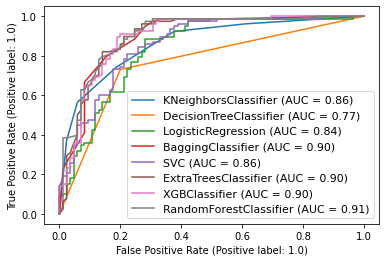

In [111]:
disp = plot_roc_curve(model1, X_test, Y_test)
plot_roc_curve(model2, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model3, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model4, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model5, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model6, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model8, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model9, X_test, Y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

#### * From the above we observe that AUC of RandomForestClassifier is maximum, hence we consider it to be our best model and we shall now tune its hyperparameter to check if it gives better results

### HyperParameter Tunning

In [112]:
clf = RandomForestClassifier()

In [113]:
params = {'max_depth' : (4,8,12,16), 'min_samples_split':(4,8,12,16),'criterion':['gini', 'entropy'], 
          'n_estimators' : [5,25,100,125], 'max_features':['sqrt', 'log2']}

In [114]:
grd = GridSearchCV(clf, param_grid = params, n_jobs=-1)

grd.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (4, 8, 12, 16),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': (4, 8, 12, 16),
                         'n_estimators': [5, 25, 100, 125]})

In [115]:
print("Best Parameters =" ,grd.best_params_)

Best Parameters = {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 125}


In [128]:
rf_clf = RandomForestClassifier(max_depth = 12, min_samples_split = 4, 
                              criterion = 'gini', n_estimators = 125, max_features = 'log2',random_state= 788)

In [139]:
model10 = rf_clf
func(model10, X_train,Y_train,X_test,Y_test)

training confucion matrix [[322   0]
 [  1 328]]
testing confucion matrix [[64 21]
 [ 7 71]]
test                precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        85
         1.0       0.77      0.91      0.84        78

    accuracy                           0.83       163
   macro avg       0.84      0.83      0.83       163
weighted avg       0.84      0.83      0.83       163

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       329

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651

cross_val_score [0.7791411  0.78527607 0.88957055 0.90797546 0.93209877]
cross_val_score Mean 0.860054533060668


#### * We Observer that our cross_val_score has increased to 86% after hyperparameter tunning and we will consider RandomForestClassifier to be our best model 

### Saving the model

In [141]:
# Saving the model using joblib :

import joblib

  
# Save the model as a pickle in a file

joblib.dump(model10,'LoanApplication.pkl')

['LoanApplication.pkl']

In [142]:
#saving the predicted as csv

joblib.dump(model10,'LoanApplication.csv')

['LoanApplication.csv']

In [143]:
x=joblib.load('LoanApplication.csv')
x.predict(X_test)

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1.])